In [3]:
library(readxl)
DATOS <- read_excel("C:/Users/JHONALEJANDROPENATEL/Documents/1Maestria/Herramientas/DATOS.xlsx")

In [44]:
EDAD=DATOS$EDAD
tabla1=data.frame(table(EDAD))
tabla2=transform(tabla1,Freac=cumsum(Freq),Frela=round(prop.table(Freq),2),Freac=round(cumsum(prop.table(Freq)),2))
tabla2

EDAD,Freq,Freac,Frela,Freac.1
19,5,5,0.05,0.05
20,2,7,0.02,0.07
22,4,11,0.04,0.11
23,2,13,0.02,0.13
24,2,15,0.02,0.15
25,2,17,0.02,0.17
27,2,19,0.02,0.19
28,2,21,0.02,0.21
29,2,23,0.02,0.23
30,2,25,0.02,0.25


Se define la función de frecuencia acumulada

In [10]:
FREC_ACU_INT <- function(y) {
  k <- nclass.Sturges(y)
  intervalos <- cut(y, breaks = k)
  tabla2 <- as.data.frame(table(intervalos))
  tabla2 <- transform(tabla2, F.Acum = cumsum(Freq), F.R = prop.table(Freq))
  tabla2 <- transform(tabla2, F.R.Acum = cumsum(F.R))
  tabla2 <- transform(tabla2, FR.Porc = 100*F.R, FRA.Porc = 100*F.R.Acum)
  midpoints <- function(x, dp=2){
    lower <- as.numeric(gsub(',.*','',gsub('\\(|\\[|\\)|\\]','', x)))
    upper <- as.numeric(gsub('.*,','',gsub('\\(|\\[|\\)|\\]','', x)))
    return(round(lower+(upper-lower)/2, dp))
  }
  tabla2 <- transform( MC = midpoints(intervalos), tabla2)
  tabla2
}

In [12]:
TFA=FREC_ACU_INT(EDAD)
TFA

intervalos,Freq,F.Acum,F.R,F.R.Acum,FR.Porc,FRA.Porc,MC
"(19,24.1]",15,15,0.15,0.15,15,15,21.55
"(24.1,29.2]",8,23,0.08,0.23,8,23,26.65
"(29.2,34.4]",16,39,0.16,0.39,16,39,31.80
"(34.4,39.5]",13,52,0.13,0.52,13,52,36.95
"(39.5,44.6]",16,68,0.16,0.68,16,68,42.05
"(44.6,49.8]",18,86,0.18,0.86,18,86,47.20
"(49.8,54.9]",2,88,0.02,0.88,2,88,52.35
"(54.9,60]",12,100,0.12,1.00,12,100,57.45


Histograma de Edad

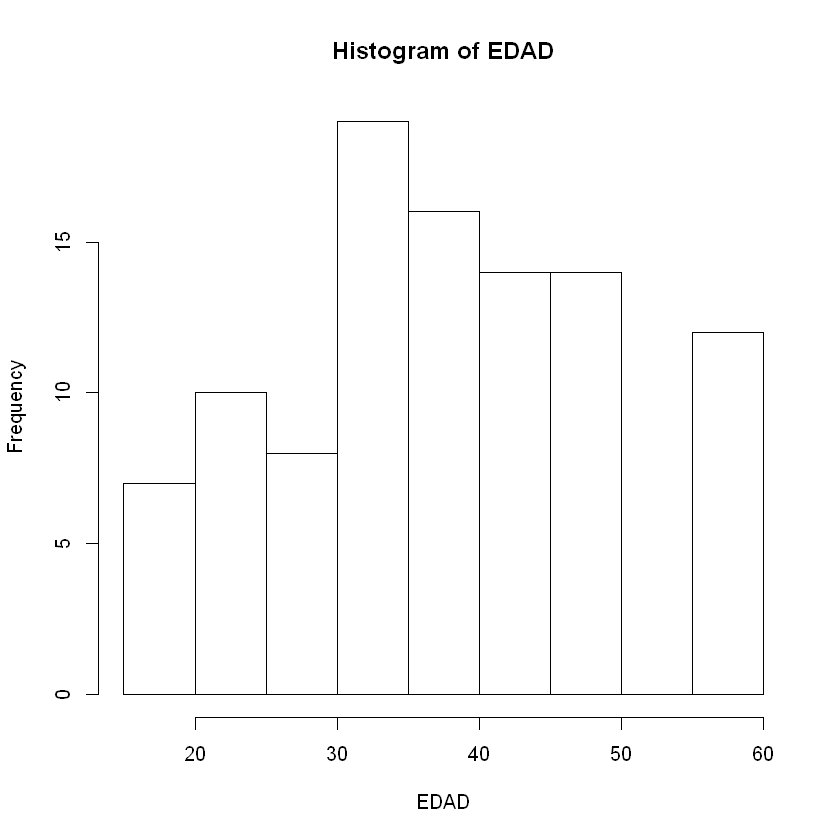

In [13]:
hist(EDAD)

Ojiva de Edad

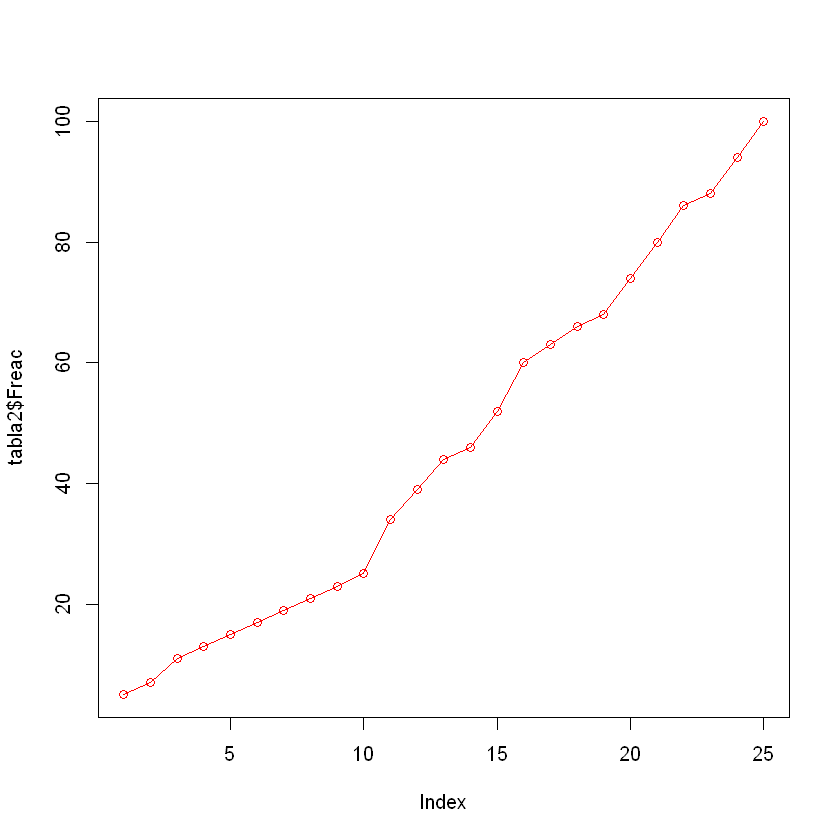

In [14]:
plot(tabla2$Freac,type="o",col = "RED")

Barras

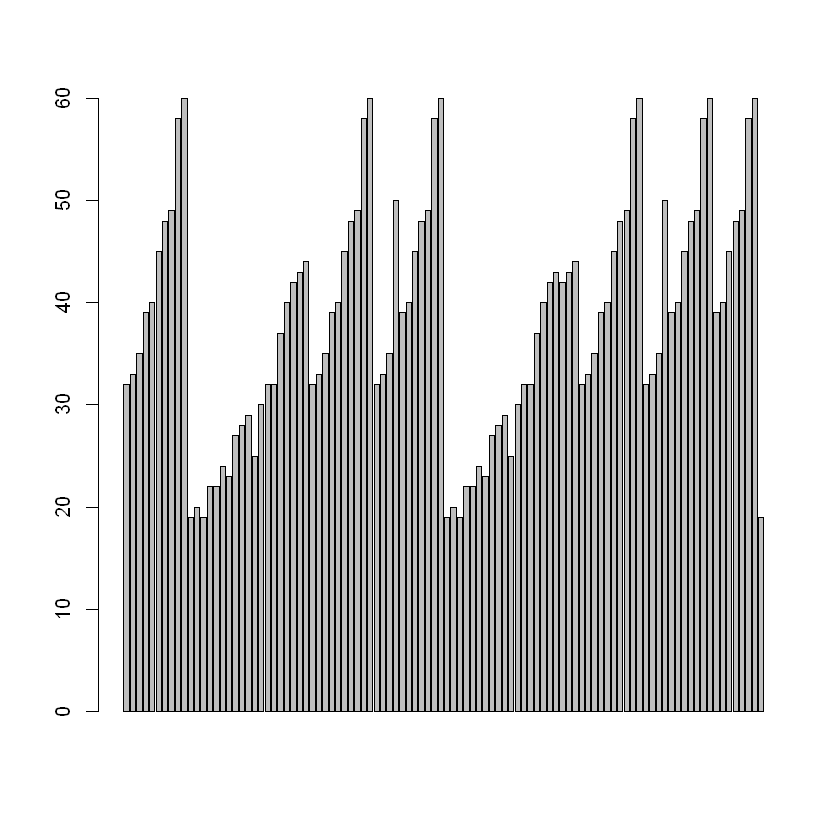

In [15]:
barplot(EDAD)

Torta

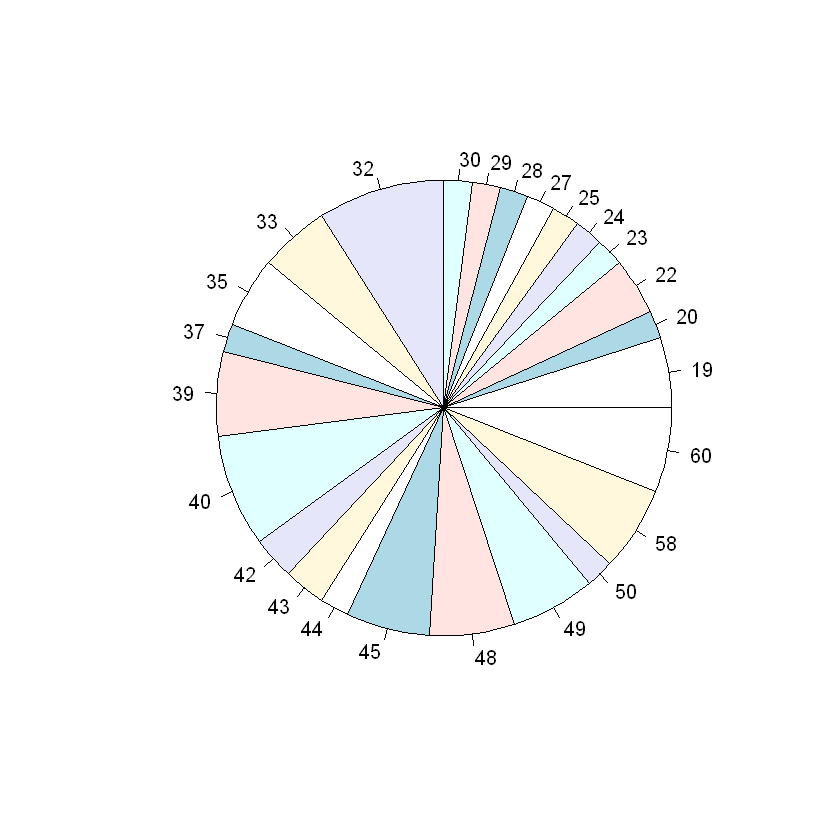

In [18]:
pie(table(EDAD))

## Medidas de Tendencia Central ##

Resumen de las medidas básicas de tendencia

In [19]:
summary(EDAD)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   31.50   39.00   38.54   48.00   60.00 

Promedio Usual

In [23]:
mean(EDAD)

[1] 38.54

mediana

In [25]:
median(EDAD)

[1] 39

Calcular el promedio aritmetico

In [26]:
P_ARIT=sum((TFA$MC)*(TFA$Freq))/sum((TFA$Freq))
P_ARIT

[1] 38.421

## Medidas de Variabilidad ##

Varianza Usual

In [27]:
VARU = sum((EDAD-mean(EDAD))^2)/length(EDAD)
VARU

[1] 133.0084

In [28]:
# Calcular la desviacion Usual
DESU=sqrt(VARU)
DESU


[1] 11.53293

In [29]:
# Coeficiente de Variabilidad
CV=DESU/mean(EDAD)
CV

# calcula el rango
RAN=max(EDAD)-min(EDAD)
RAN

# Rango intercuartilico
IQR=quantile(EDAD,0.75)-quantile(EDAD,0.25)
IQR
IQR(EDAD)

[1] 0.2992456

[1] 41

75% 
16.5

[1] 16.5

## Medidas de Localización ##

In [33]:
PERCENTIL_68=quantile(EDAD,0.68)
PERCENTIL_68

PERCENTIL_79=quantile(EDAD,0.79)
PERCENTIL_79

68% 
44.32

79% 
 48

## Medidas de Simetría y Forma ##

In [34]:
# Calcular la asimetria
AS=sum((EDAD-mean(EDAD))^3)/(length(EDAD)*(DESU^3))
AS

# Calcular Curtosis
K=sum((EDAD-mean(EDAD))^4)/(length(EDAD)*(DESU^4))
K

# Calcular la curtosis trasladada a cero
KA=K-3
KA

[1] 0.1438672

[1] 2.231827

[1] -0.768173

## Medidas de atipicidad ##
Dibujar el boxplot

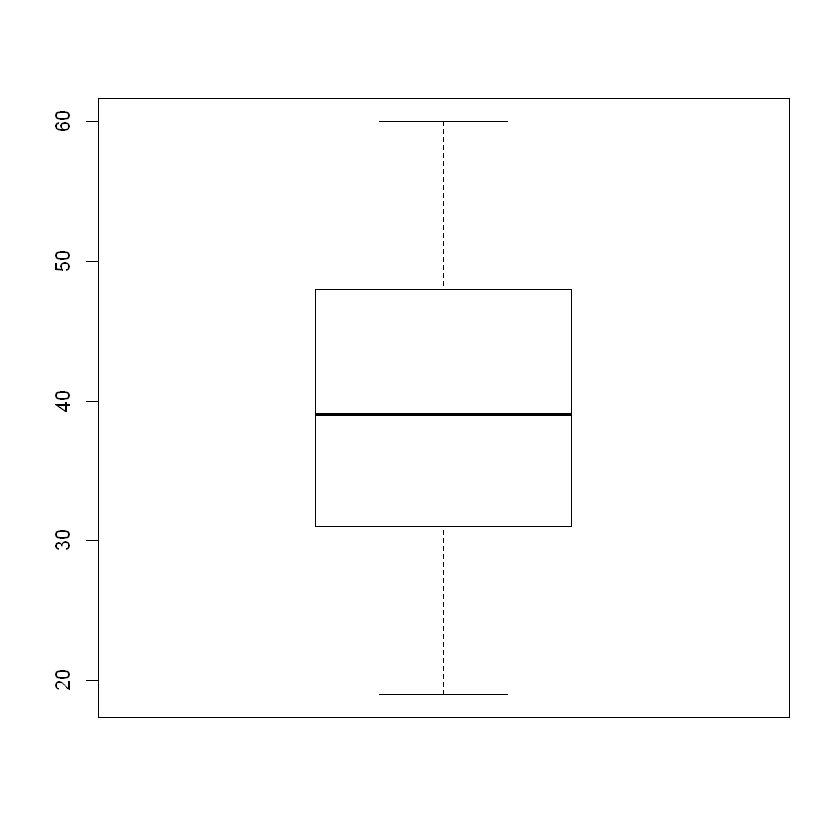

In [39]:
boxplot(EDAD)

## Variables Cualitativas ##

In [42]:
ESTADO=DATOS$ESTADO_CIVIL
tabla1=data.frame(table(ESTADO))
tabla1

ESTADO,Freq
CASADO,47
DIVORCIADO,12
OTRO,18
SOLTERO,23
